In [3]:

# import needed modules
import time
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
start = datetime.date(2015,1,1)
end = datetime.date.today()



In [4]:
# ticker_info = yf.Ticker("9984.T")
# hist = ticker_info.history(period="max")
# VYM VTI VNQI VNQ
# tickerList = ['VT','BND','','GLD','','','VIG','']
tickerList = ['VT','BND','GLD','VIG','PDBC','VNQ']
data = yf.download(tickerList, start=start, end=end)["Adj Close"]
data

[*********************100%***********************]  6 of 6 completed


,BND,GLD,PDBC,VIG,VNQ,VT
Date,,,,,,
2014-12-31,68.108116,113.580002,12.211199,70.288635,60.898674,51.231133
2015-01-02,68.339630,114.080002,12.108197,70.167358,61.815933,51.094784
2015-01-05,68.538078,115.800003,11.959420,69.041504,62.154243,50.106308
2015-01-06,68.736519,117.120003,11.814648,68.435257,62.770744,49.603539
2015-01-07,68.777855,116.430000,11.745410,69.327316,63.733097,50.242653
...,...,...,...,...,...,...
2022-05-17,75.610001,169.330002,19.110001,152.830002,97.480003,91.930000
2022-05-18,75.930000,169.419998,18.670000,146.639999,94.650002,88.870003
2022-05-19,76.089996,171.910004,18.900000,145.210007,94.230003,89.099998


In [5]:
# calculate daily and annual returns of the stocks
#returns_daily = table.pct_change()
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(tickerList)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

weights = np.random.random(num_assets)
weights /= np.sum(weights)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
   weights = np.random.random(num_assets)
   weights /= np.sum(weights)
   returns = np.dot(weights, returns_annual)
   volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
   sharpe = returns / volatility # decrease risk free return
   sharpe_ratio.append(sharpe)
   port_returns.append(returns)
   port_volatility.append(volatility)
   stock_weights.append(weights)
   
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
            'Volatility': port_volatility,
            'Sharpe Ratio': sharpe_ratio}
            
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(tickerList):
   portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in tickerList]

# reorder dataframe columns
df = df[column_order]

# dict_keys(['Returns', 'Volatility', 'Sharpe Ratio', 'VT Weight', 'BND Weight', 'GLD Weight', 'VIG Weight', 'PDBC Weight', 'VNQ Weight'])
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]




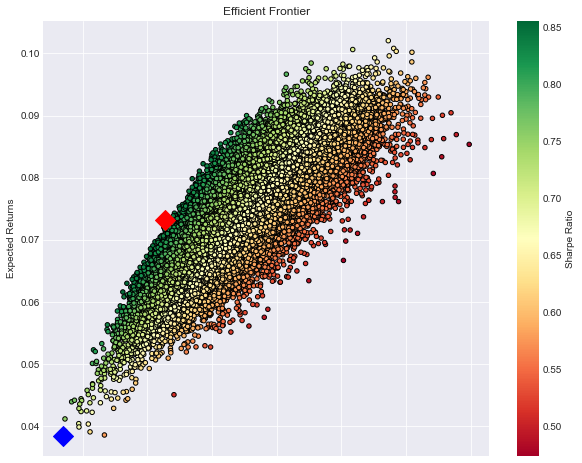

In [7]:
# # plot frontier, max sharpe & min Volatility values with a scatterplot
# plt.style.use('seaborn-dark')
# df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
#                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
# plt.xlabel('Volatility (Std. Deviation)')
# plt.ylabel('Expected Returns')
# plt.title('Efficient Frontier')
# plt.show()

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
               cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

<AxesSubplot:xlabel='Date', ylabel='相対価格'>

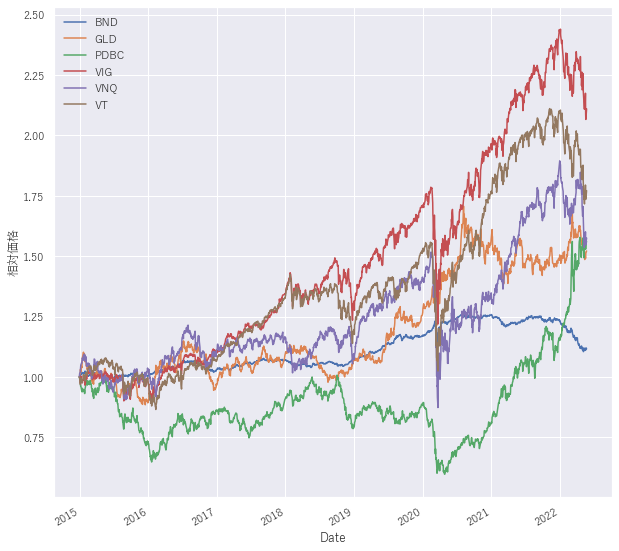

In [41]:
# 可視化
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font='Yu Gothic')

# 可視化用コード
# 価格推移
# plot_df = all_df/all_df.loc['2020-11-02',:]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('相対価格')

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()

simple_return =  returns_daily + 1
simple_return.iloc[0,:] = 1
#simple_return = simple_return.resample('M').sum()
simple_return = simple_return.cumprod()
simple_return.plot(figsize=(10,10),ax=ax)


<AxesSubplot:>

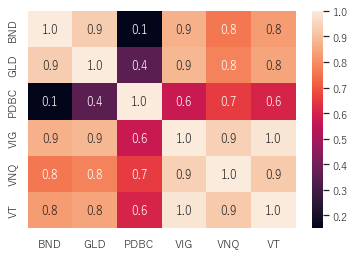

In [13]:
# 相関係数
sns.heatmap(data.corr(),annot=True, fmt="1.1f")